# Data preparation
Since we have so much data, we will be selecting certain attributes for each problem we will be looking at.
The dataset created in this file will be used for the classification problem. 
It will share many attributes with the other datasets.

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
acs = pd.read_csv("acs_alldata.csv", dtype=str, na_values=["(X)", "N", "-"])

In [3]:
acs.head()

,GEO_ID,NAME,DP02_0001E,DP02_0001M,DP02_0001PE,DP02_0001PM,DP02_0002E,DP02_0002M,DP02_0002PE,DP02_0002PM,...,DP05_0087PE,DP05_0087PM,DP05_0088E,DP05_0088M,DP05_0088PE,DP05_0088PM,DP05_0089E,DP05_0089M,DP05_0089PE,DP05_0089PM
0,1600000US0100100,"Abanda CDP, Alabama",70,40,70,NaN,14,22,20,35.8,...,131,NaN,41,61,31.3,30.6,90,47,68.7,30.6
1,1600000US0100124,"Abbeville city, Alabama",982,113,982,NaN,615,74,62.6,6.8,...,2083,NaN,1079,111,51.8,4,1004,93,48.2,4
2,1600000US0100460,"Adamsville city, Alabama",1601,148,1601,NaN,1085,87,67.8,6.7,...,3437,NaN,1584,179,46.1,3.6,1853,147,53.9,3.6
3,1600000US0100484,"Addison town, Alabama",339,71,339,NaN,198,55,58.4,10.2,...,579,NaN,309,85,53.4,5.8,270,73,46.6,5.8
4,1600000US0100676,"Akron town, Alabama",110,33,110,NaN,62,29,56.4,16.7,...,260,NaN,120,67,46.2,12.7,140,51,53.8,12.7


In [4]:
acs.shape

(29568, 2086)

## Selecting relevant columns
We now select the specific columns that are relevant for the problems we are looking at

In [5]:
attributes = {
    "DP02_0015E": "ave_household_size",
    "DP03_0062E": "median_income",
    "DP04_0005E": "rental_vacancy_rate",
    "DP04_0007PE": "p_units_1_detached",
    "DP04_0008PE": "p_units_1",
    "DP04_0009PE": "p_units_2",
    "DP04_0010PE": "p_units_34",
    "DP04_0011PE": "p_units_59",
    "DP04_0012PE": "p_units_10",
    "DP04_0013PE": "p_units_20",
    "DP04_0017PE": "p_built_2014",
    "DP04_0018PE": "p_built_2010",
    "DP04_0019PE": "p_built_2000",
    "DP04_0020PE": "p_built_1990",
    "DP04_0021PE": "p_built_1980",
    "DP04_0022PE": "p_built_1970",
    "DP04_0023PE": "p_built_1960",
    "DP04_0024PE": "p_built_1950",
    "DP04_0025PE": "p_built_1940",
    "DP04_0026PE": "p_built_1930",
    "DP04_0037E": "median_rooms",
    "DP04_0134E": "median_rent",
    "DP04_0089E": "median-value"
}

In [6]:
# select the colums
acs = acs.filter(attributes)
acs

,DP02_0015E,DP03_0062E,DP04_0005E,DP04_0007PE,DP04_0008PE,DP04_0009PE,DP04_0010PE,DP04_0011PE,DP04_0012PE,DP04_0013PE,...,DP04_0020PE,DP04_0021PE,DP04_0022PE,DP04_0023PE,DP04_0024PE,DP04_0025PE,DP04_0026PE,DP04_0037E,DP04_0134E,DP04_0089E
0,2.49,NaN,0,100,0,0,0,0,0,0,...,0,0,35.7,18.6,45.7,0,0,6,NaN,NaN
1,2.46,40724,26.8,69.7,0,11.2,2.3,0,3.7,0.9,...,12.4,12.8,20.1,19.3,10.9,7.6,11.5,5.4,553,80200
2,2.73,49077,3.4,90.9,0.6,0,0,0,1.2,0,...,10.7,7.1,20.5,31.2,13.3,8.3,5.5,5.9,862,97100
3,2.14,35250,0,66,0,7.4,2.7,3.2,0,0.8,...,27.4,12,22.3,13.3,6.6,3.5,3.7,5.8,356,75100
4,2.85,19821,0,63.5,0,0,0,0,0,0,...,19.5,9,9,5.5,14.5,19,14.5,4.7,533,38800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29563,NaN,22661,8.9,77.7,14.5,0.7,1.7,3.1,0.6,0.8,...,12.5,8.9,37.1,23.7,9.1,2.8,3.4,5.1,423,90600
29564,NaN,14450,1.5,68.7,17.4,2.9,2.8,5.3,0.4,2.6,...,13.2,16.8,27.6,20.6,4.2,3.6,1.1,4.5,398,92900
29565,NaN,20996,21,73.7,16.3,0.8,1.5,3.8,2,1.9,...,16.5,23.1,24.5,19.7,4.1,3.5,2.6,5,397,100100
29566,NaN,15833,0,89.4,10.6,0,0,0,0,0,...,19.9,19.5,22.6,18.8,13.3,0,4.1,5.1,NaN,73000


In [7]:
# remove the last row
acs = acs.drop([29567])

In [8]:
# rename the columns of the dataset
acs = acs.rename(columns=attributes)

In [9]:
acs.dtypes

ave_household_size     object
median_income          object
rental_vacancy_rate    object
p_units_1_detached     object
p_units_1              object
p_units_2              object
p_units_34             object
p_units_59             object
p_units_10             object
p_units_20             object
p_built_2014           object
p_built_2010           object
p_built_2000           object
p_built_1990           object
p_built_1980           object
p_built_1970           object
p_built_1960           object
p_built_1950           object
p_built_1940           object
p_built_1930           object
median_rooms           object
median_rent            object
median-value           object
dtype: object

In [10]:
for col in acs:
    acs[col] = pd.to_numeric(acs[col], errors="coerce")

In [11]:
acs = acs.dropna()

In [12]:
acs

,ave_household_size,median_income,rental_vacancy_rate,p_units_1_detached,p_units_1,p_units_2,p_units_34,p_units_59,p_units_10,p_units_20,...,p_built_1990,p_built_1980,p_built_1970,p_built_1960,p_built_1950,p_built_1940,p_built_1930,median_rooms,median_rent,median-value
1,2.46,40724.0,26.8,69.7,0.0,11.2,2.3,0.0,3.7,0.9,...,12.4,12.8,20.1,19.3,10.9,7.6,11.5,5.4,553.0,80200.0
2,2.73,49077.0,3.4,90.9,0.6,0.0,0.0,0.0,1.2,0.0,...,10.7,7.1,20.5,31.2,13.3,8.3,5.5,5.9,862.0,97100.0
3,2.14,35250.0,0.0,66.0,0.0,7.4,2.7,3.2,0.0,0.8,...,27.4,12.0,22.3,13.3,6.6,3.5,3.7,5.8,356.0,75100.0
4,2.85,19821.0,0.0,63.5,0.0,0.0,0.0,0.0,0.0,0.0,...,19.5,9.0,9.0,5.5,14.5,19.0,14.5,4.7,533.0,38800.0
5,2.97,74383.0,7.2,84.8,3.2,0.6,1.2,2.8,1.4,0.9,...,35.3,15.5,15.0,4.0,2.3,1.0,0.6,6.6,983.0,167800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29306,2.25,46924.0,10.4,75.3,2.9,1.9,4.8,3.5,3.1,1.1,...,2.9,23.6,26.8,6.0,14.3,2.4,19.5,6.4,648.0,166200.0
29308,2.84,115363.0,21.2,97.6,0.0,0.0,0.0,0.0,0.0,0.0,...,26.7,18.1,24.4,4.3,2.7,0.0,3.3,5.7,1339.0,1121400.0
29310,2.36,49191.0,17.4,70.8,3.1,2.7,10.4,1.6,0.8,1.1,...,4.7,6.4,24.4,17.0,26.0,6.0,9.1,5.9,606.0,137800.0
29311,2.49,75500.0,17.7,37.8,0.8,2.7,1.4,0.0,0.0,10.8,...,15.3,25.3,22.3,0.9,1.0,0.0,0.0,5.6,1088.0,172400.0


In [37]:
test = acs.copy()
for col in test:
    q1 = test[col].quantile(.25)
    q3 = test[col].quantile(.75)
    
    iqr = q3 - q1
    threshold = iqr * 1.5
    
    test = acs[(acs[col] > q1-threshold) & (acs[col] < q3+threshold)]

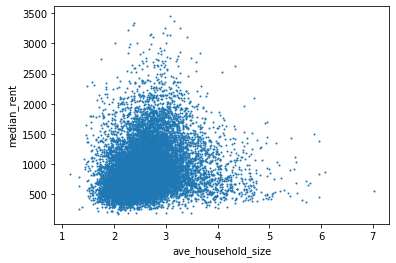

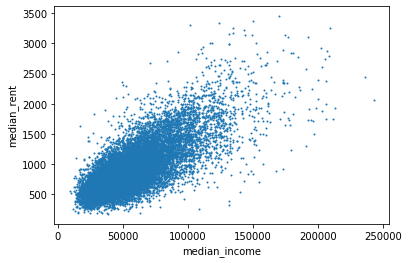

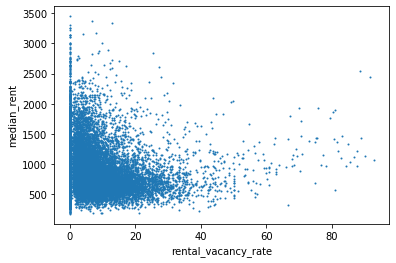

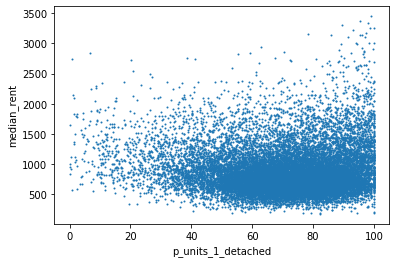

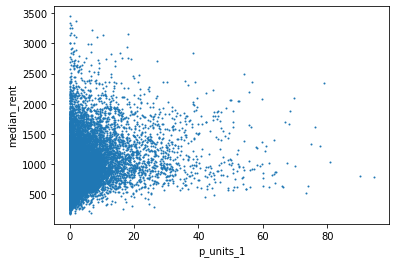

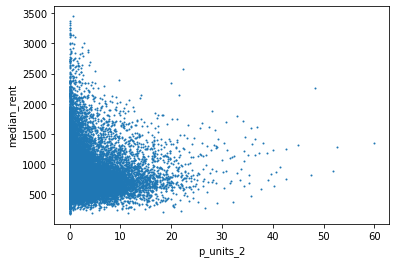

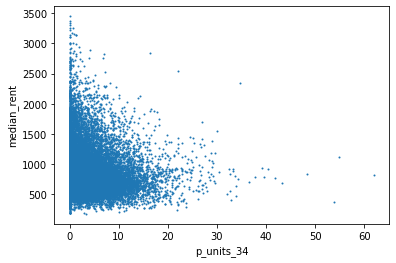

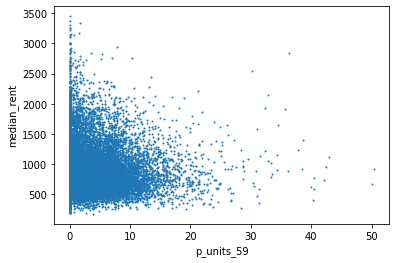

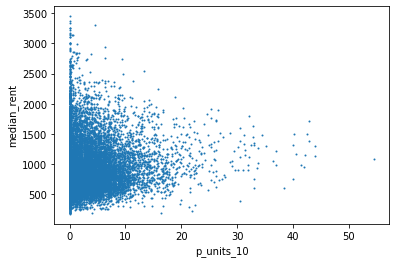

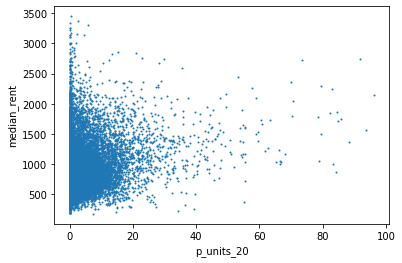

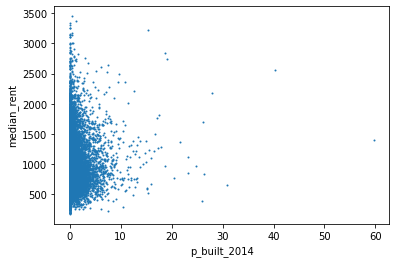

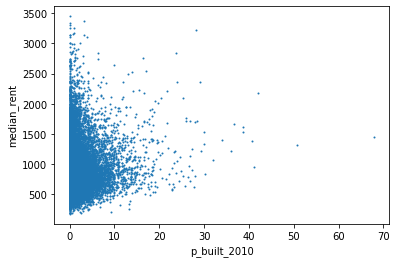

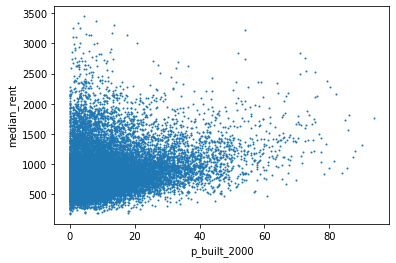

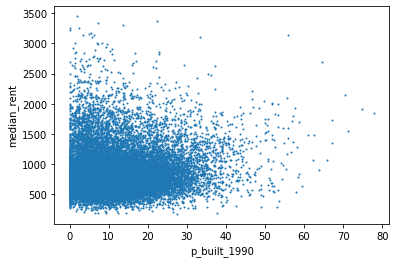

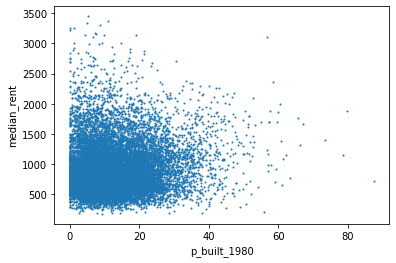

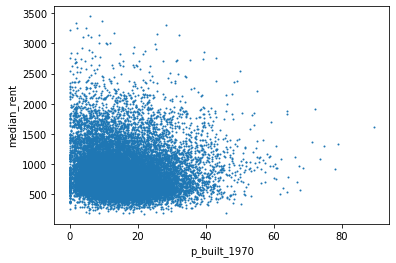

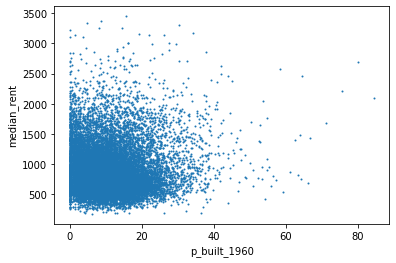

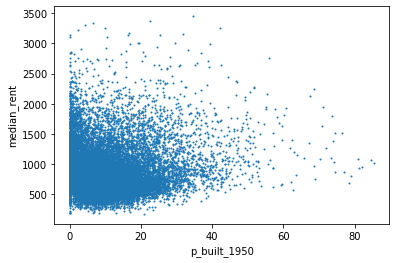

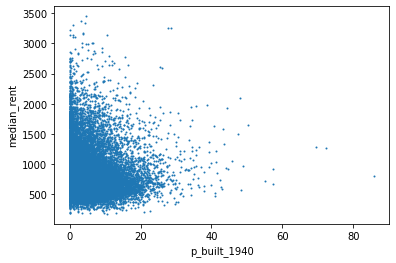

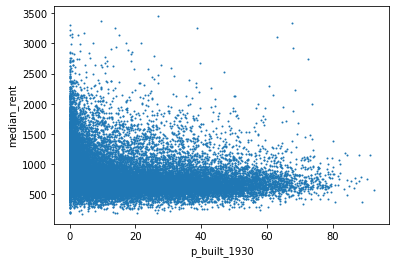

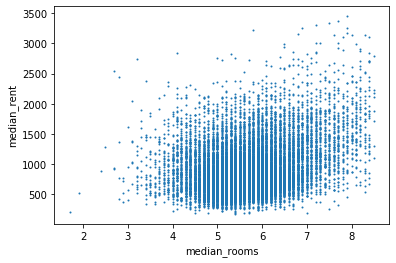

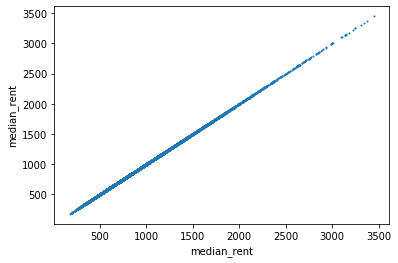

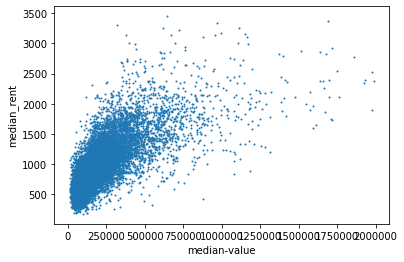

In [18]:
for col in acs:
    acs.plot.scatter(x=col, y="median_rent", s=1)

C:\Users\michl\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


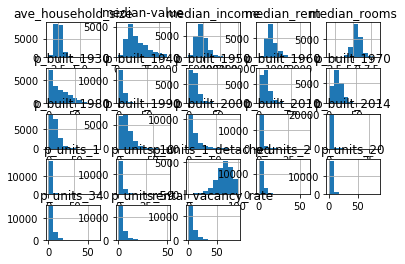

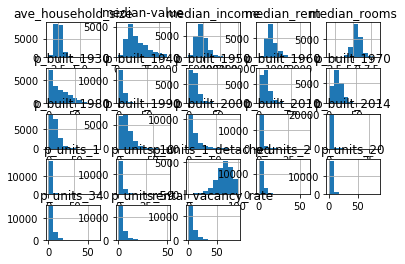

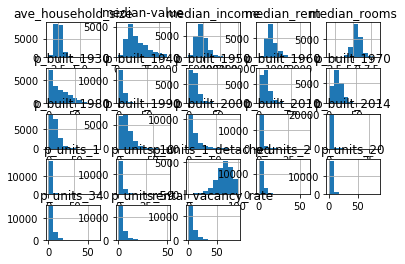

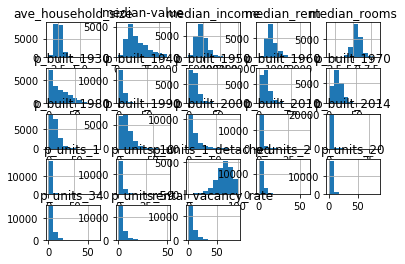

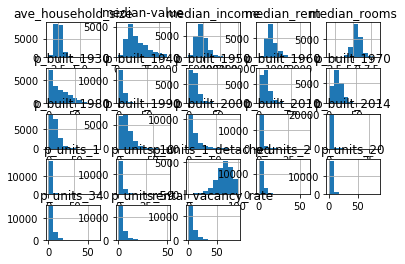

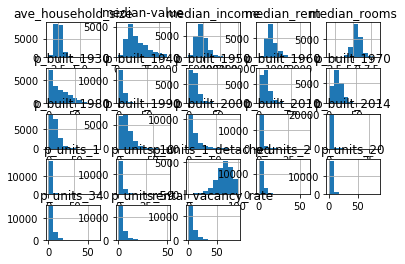

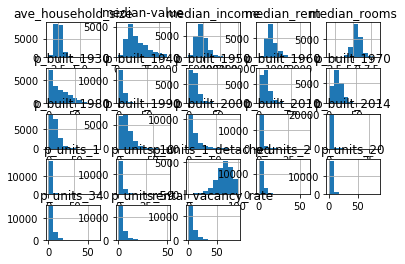

Error in callback <function flush_figures at 0x00000246002C48B8> (for post_execute):


KeyboardInterrupt: 

In [44]:
for col in test:
    test.hist()

In [45]:
test

,ave_household_size,median_income,rental_vacancy_rate,p_units_1_detached,p_units_1,p_units_2,p_units_34,p_units_59,p_units_10,p_units_20,...,p_built_1990,p_built_1980,p_built_1970,p_built_1960,p_built_1950,p_built_1940,p_built_1930,median_rooms,median_rent,median-value
1,2.46,40724.0,26.8,69.7,0.0,11.2,2.3,0.0,3.7,0.9,...,12.4,12.8,20.1,19.3,10.9,7.6,11.5,5.4,553.0,80200.0
2,2.73,49077.0,3.4,90.9,0.6,0.0,0.0,0.0,1.2,0.0,...,10.7,7.1,20.5,31.2,13.3,8.3,5.5,5.9,862.0,97100.0
3,2.14,35250.0,0.0,66.0,0.0,7.4,2.7,3.2,0.0,0.8,...,27.4,12.0,22.3,13.3,6.6,3.5,3.7,5.8,356.0,75100.0
4,2.85,19821.0,0.0,63.5,0.0,0.0,0.0,0.0,0.0,0.0,...,19.5,9.0,9.0,5.5,14.5,19.0,14.5,4.7,533.0,38800.0
5,2.97,74383.0,7.2,84.8,3.2,0.6,1.2,2.8,1.4,0.9,...,35.3,15.5,15.0,4.0,2.3,1.0,0.6,6.6,983.0,167800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29297,1.95,48125.0,17.3,68.8,2.6,7.7,0.0,2.8,0.0,0.0,...,15.5,13.2,24.0,4.9,11.0,7.3,15.0,5.1,711.0,136000.0
29306,2.25,46924.0,10.4,75.3,2.9,1.9,4.8,3.5,3.1,1.1,...,2.9,23.6,26.8,6.0,14.3,2.4,19.5,6.4,648.0,166200.0
29310,2.36,49191.0,17.4,70.8,3.1,2.7,10.4,1.6,0.8,1.1,...,4.7,6.4,24.4,17.0,26.0,6.0,9.1,5.9,606.0,137800.0
29311,2.49,75500.0,17.7,37.8,0.8,2.7,1.4,0.0,0.0,10.8,...,15.3,25.3,22.3,0.9,1.0,0.0,0.0,5.6,1088.0,172400.0


In [46]:
test.to_csv("rent.csv")